In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, BatchNormalization, Dropout

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

### Showing the Imgages

Mounted at /content/drive


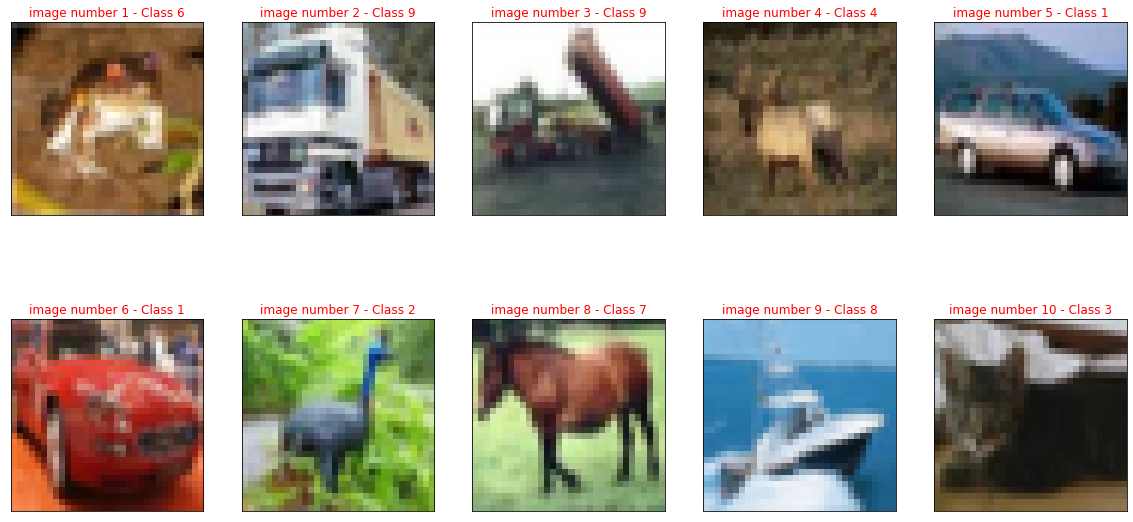

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_name = "/content/drive/My Drive/Courses/DeepLearning/HW02/Q01/datas/data_batch_{0}".format(1)
train = unpickle(file_name)

data = train[b'data']
labels = train[b'labels']

fig, axes = plt.subplots(2, 5, figsize=(20,10))

for i, ax in enumerate(axes.flat):
    R = data[i,0:32*32]
    G = data[i,32*32:32*32*2]
    B = data[i,2*32*32:32*32*3]
    img = np.zeros((32,32,3))
    img[:,:,0] = R.reshape(32,32)
    img[:,:,1] = G.reshape(32,32)
    img[:,:,2] = B.reshape(32,32)
    ax.imshow(img/255)
    ax.set_title("image number {0} - Class {1}".format(i+1, labels[i]), color='r')
    ax.set_xticks([])
    ax.set_yticks([])

###  Seperating the datas to train, validation, and test

In [5]:
file_name = "/content/drive/My Drive/Courses/DeepLearning/HW02/Q01/datas/data_batch_{0}".format(1)
train = unpickle(file_name)
for i in range(2,6):
    file_name = "/content/drive/My Drive/Courses/DeepLearning/HW02/Q01/datas/data_batch_{0}".format(i)
    temp = unpickle(file_name)
    train[b'data'] = np.concatenate((train[b'data'], temp[b'data']))
    train[b'labels'] = np.concatenate((train[b'labels'], temp[b'labels']))   

indices = tf.range(start=0, limit=tf.shape(train[b'labels'])[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

train[b'data'] = tf.gather(train[b'data'], shuffled_indices)
train[b'labels'] = tf.gather(train[b'labels'], shuffled_indices)

validation = {}
num_train = 40000
validation[b'data'] = train[b'data'][num_train:]
validation[b'labels'] = train[b'labels'][num_train:]

train[b'data'] = train[b'data'][0:num_train]
train[b'labels'] = train[b'labels'][0:num_train]

file_name = "/content/drive/My Drive/Courses/DeepLearning/HW02/Q01/datas/test_batch"
test = unpickle(file_name)


indices = tf.range(start=0, limit=tf.shape(test[b'labels'])[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

test[b'data'] = tf.gather(test[b'data'], shuffled_indices)
test[b'labels'] = tf.gather(test[b'labels'], shuffled_indices)


num_classes = 10
feature_vector_length = 32*32*3
input_shape = (feature_vector_length,)

X_train = train[b'data']/255
Y_train = tf.keras.utils.to_categorical(train[b'labels'], num_classes)

X_validation = validation[b'data']/255
Y_validation = tf.keras.utils.to_categorical(validation[b'labels'], num_classes)

X_test = test[b'data']/255
Y_test = tf.keras.utils.to_categorical(test[b'labels'], num_classes)

tf.Tensor(
[[231 230 229 ... 220 220 221]
 [129 145 148 ... 190 176 178]
 [ 24  25  22 ...  11  14  14]
 ...
 [ 39  36  40 ...  96  86  83]
 [116 114  72 ...  67  80  81]
 [ 70  39  30 ...  52  39  30]], shape=(40000, 3072), dtype=uint8)
tf.Tensor(
[[0.90588236 0.9019608  0.8980392  ... 0.8627451  0.8627451  0.8666667 ]
 [0.5058824  0.5686275  0.5803922  ... 0.74509805 0.6901961  0.69803923]
 [0.09411765 0.09803922 0.08627451 ... 0.04313726 0.05490196 0.05490196]
 ...
 [0.15294118 0.14117648 0.15686275 ... 0.3764706  0.3372549  0.3254902 ]
 [0.45490196 0.44705883 0.28235295 ... 0.2627451  0.3137255  0.31764707]
 [0.27450982 0.15294118 0.11764706 ... 0.20392157 0.15294118 0.11764706]], shape=(40000, 3072), dtype=float32)


## MLP

### Part a - ReLU

#### batch size = 32

In [10]:
batch_size = 32
epochs_number = 10
learning_rate = 1e-2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]))

Epoch 1/10
1250/1250 [==============================] - 24s 18ms/step - loss: 1.8200 - accuracy: 0.3508 - val_loss: 1.6638 - val_accuracy: 0.4224
Epoch 2/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.6315 - accuracy: 0.4243 - val_loss: 1.6335 - val_accuracy: 0.4250
Epoch 3/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.5498 - accuracy: 0.4523 - val_loss: 1.5225 - val_accuracy: 0.4653
Epoch 4/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.4898 - accuracy: 0.4758 - val_loss: 1.5131 - val_accuracy: 0.4602
Epoch 5/10
1250/1250 [==============================] - 22s 18ms/step - loss: 1.4395 - accuracy: 0.4926 - val_loss: 1.5030 - val_accuracy: 0.4730
Epoch 6/10
1250/1250 [==============================] - 22s 18ms/step - loss: 1.3931 - accuracy: 0.5084 - val_loss: 1.4441 - val_accuracy: 0.4973
Epoch 7/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.3538 - accuracy: 0.5235 - val_loss: 1.4239 -

#### batch size = 64

In [11]:
batch_size = 64
epochs_number = 10
learning_rate = 1e-2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]))

Epoch 1/10
625/625 [==============================] - 13s 21ms/step - loss: 1.8717 - accuracy: 0.3345 - val_loss: 1.7349 - val_accuracy: 0.3997
Epoch 2/10
625/625 [==============================] - 13s 20ms/step - loss: 1.6881 - accuracy: 0.4083 - val_loss: 1.6346 - val_accuracy: 0.4371
Epoch 3/10
625/625 [==============================] - 12s 20ms/step - loss: 1.6105 - accuracy: 0.4350 - val_loss: 1.6243 - val_accuracy: 0.4270
Epoch 4/10
625/625 [==============================] - 12s 20ms/step - loss: 1.5577 - accuracy: 0.4530 - val_loss: 1.5675 - val_accuracy: 0.4513
Epoch 5/10
625/625 [==============================] - 12s 20ms/step - loss: 1.5117 - accuracy: 0.4713 - val_loss: 1.5361 - val_accuracy: 0.4559
Epoch 6/10
625/625 [==============================] - 13s 20ms/step - loss: 1.4779 - accuracy: 0.4833 - val_loss: 1.5161 - val_accuracy: 0.4690
Epoch 7/10
625/625 [==============================] - 12s 20ms/step - loss: 1.4431 - accuracy: 0.4940 - val_loss: 1.5265 - val_accuracy:

#### batch size = 256

In [12]:
batch_size = 256
epochs_number = 10
learning_rate = 1e-2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]))

Epoch 1/10
157/157 [==============================] - 7s 39ms/step - loss: 1.9857 - accuracy: 0.2920 - val_loss: 1.9263 - val_accuracy: 0.3094
Epoch 2/10
157/157 [==============================] - 6s 37ms/step - loss: 1.8250 - accuracy: 0.3574 - val_loss: 1.8299 - val_accuracy: 0.3558
Epoch 3/10
157/157 [==============================] - 6s 38ms/step - loss: 1.7580 - accuracy: 0.3869 - val_loss: 1.8204 - val_accuracy: 0.3666
Epoch 4/10
157/157 [==============================] - 6s 38ms/step - loss: 1.7173 - accuracy: 0.4024 - val_loss: 1.7974 - val_accuracy: 0.3759
Epoch 5/10
157/157 [==============================] - 6s 37ms/step - loss: 1.6867 - accuracy: 0.4130 - val_loss: 1.9523 - val_accuracy: 0.3167
Epoch 6/10
157/157 [==============================] - 6s 37ms/step - loss: 1.6585 - accuracy: 0.4236 - val_loss: 1.6999 - val_accuracy: 0.4036
Epoch 7/10
157/157 [==============================] - 6s 38ms/step - loss: 1.6309 - accuracy: 0.4337 - val_loss: 1.6934 - val_accuracy: 0.4090

### Part b - tanh

#### batch size = 32

In [13]:
batch_size = 32
epochs_number = 10
learning_rate = 1e-2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='tanh'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='tanh'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]))

Epoch 1/10
1250/1250 [==============================] - 23s 18ms/step - loss: 2.0114 - accuracy: 0.3172 - val_loss: 1.7820 - val_accuracy: 0.3860
Epoch 2/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.7607 - accuracy: 0.3795 - val_loss: 1.7081 - val_accuracy: 0.3974
Epoch 3/10
1250/1250 [==============================] - 22s 18ms/step - loss: 1.6934 - accuracy: 0.4040 - val_loss: 1.7287 - val_accuracy: 0.3949
Epoch 4/10
1250/1250 [==============================] - 22s 18ms/step - loss: 1.6442 - accuracy: 0.4203 - val_loss: 1.6315 - val_accuracy: 0.4293
Epoch 5/10
1250/1250 [==============================] - 23s 19ms/step - loss: 1.5998 - accuracy: 0.4365 - val_loss: 1.6082 - val_accuracy: 0.4356
Epoch 6/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.5677 - accuracy: 0.4474 - val_loss: 1.6245 - val_accuracy: 0.4254
Epoch 7/10
1250/1250 [==============================] - 22s 18ms/step - loss: 1.5397 - accuracy: 0.4557 - val_loss: 1.5841 -

#### batch size = 64

In [14]:
batch_size = 64
epochs_number = 10
learning_rate = 1e-2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='tanh'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='tanh'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]))

Epoch 1/10
625/625 [==============================] - 13s 21ms/step - loss: 2.0704 - accuracy: 0.2988 - val_loss: 1.7866 - val_accuracy: 0.3756
Epoch 2/10
625/625 [==============================] - 13s 20ms/step - loss: 1.7990 - accuracy: 0.3650 - val_loss: 1.7356 - val_accuracy: 0.3929
Epoch 3/10
625/625 [==============================] - 13s 20ms/step - loss: 1.7427 - accuracy: 0.3866 - val_loss: 1.7325 - val_accuracy: 0.3922
Epoch 4/10
625/625 [==============================] - 13s 21ms/step - loss: 1.6963 - accuracy: 0.4038 - val_loss: 1.6683 - val_accuracy: 0.4187
Epoch 5/10
625/625 [==============================] - 13s 20ms/step - loss: 1.6605 - accuracy: 0.4173 - val_loss: 1.6907 - val_accuracy: 0.4003
Epoch 6/10
625/625 [==============================] - 13s 21ms/step - loss: 1.6266 - accuracy: 0.4291 - val_loss: 1.7773 - val_accuracy: 0.3729
Epoch 7/10
625/625 [==============================] - 13s 20ms/step - loss: 1.6065 - accuracy: 0.4339 - val_loss: 1.6257 - val_accuracy:

#### batch size = 256

In [ ]:
batch_size = 256
epochs_number = 20
learning_rate = 1e-2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='tanh'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='tanh'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]))

Epoch 1/20
40/40 [==============================] - 7s 163ms/step - loss: 2.2659 - accuracy: 0.1458 - val_loss: 2.2330 - val_accuracy: 0.1696
Epoch 2/20
40/40 [==============================] - 6s 151ms/step - loss: 2.1976 - accuracy: 0.2008 - val_loss: 2.1772 - val_accuracy: 0.2138
Epoch 3/20
40/40 [==============================] - 7s 165ms/step - loss: 2.1492 - accuracy: 0.2341 - val_loss: 2.1538 - val_accuracy: 0.1983
Epoch 4/20
40/40 [==============================] - 6s 157ms/step - loss: 2.1132 - accuracy: 0.2511 - val_loss: 2.1123 - val_accuracy: 0.2252
Epoch 5/20
40/40 [==============================] - 6s 146ms/step - loss: 2.0823 - accuracy: 0.2676 - val_loss: 2.0916 - val_accuracy: 0.2419
Epoch 6/20
40/40 [==============================] - 6s 157ms/step - loss: 2.0578 - accuracy: 0.2831 - val_loss: 2.0602 - val_accuracy: 0.2684
Epoch 7/20
40/40 [==============================] - 6s 164ms/step - loss: 2.0362 - accuracy: 0.2911 - val_loss: 2.0438 - val_accuracy: 0.2812
Epoch 

### Part c

#### MSE

In [16]:
batch_size = 32
epochs_number = 10
learning_rate = 1e-2
momentum = 0.05
hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]))

Epoch 1/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.0865 - accuracy: 0.2232 - val_loss: 0.0838 - val_accuracy: 0.2866
Epoch 2/10
1250/1250 [==============================] - 22s 18ms/step - loss: 0.0824 - accuracy: 0.3072 - val_loss: 0.0810 - val_accuracy: 0.3276
Epoch 3/10
1250/1250 [==============================] - 22s 17ms/step - loss: 0.0803 - accuracy: 0.3441 - val_loss: 0.0795 - val_accuracy: 0.3547
Epoch 4/10
1250/1250 [==============================] - 22s 18ms/step - loss: 0.0788 - accuracy: 0.3616 - val_loss: 0.0783 - val_accuracy: 0.3709
Epoch 5/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.0777 - accuracy: 0.3740 - val_loss: 0.0773 - val_accuracy: 0.3790
Epoch 6/10
1250/1250 [==============================] - 22s 17ms/step - loss: 0.0768 - accuracy: 0.3830 - val_loss: 0.0767 - val_accuracy: 0.3830
Epoch 7/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.0761 - accuracy: 0.3887 - val_loss: 0.0758 -

#### Cross Entropy

In [8]:
batch_size = 64
epochs_number = 10
learning_rate = 1e-2
momentum = 0.2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy','Recall', 'Precision'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]))

Epoch 1/10
625/625 [==============================] - 15s 22ms/step - loss: 1.8581 - accuracy: 0.3372 - recall: 0.0569 - precision: 0.6306 - val_loss: 1.7229 - val_accuracy: 0.3946 - val_recall: 0.0915 - val_precision: 0.6733
Epoch 2/10
625/625 [==============================] - 14s 22ms/step - loss: 1.6745 - accuracy: 0.4096 - recall: 0.1226 - precision: 0.6850 - val_loss: 1.6482 - val_accuracy: 0.4175 - val_recall: 0.1316 - val_precision: 0.6819
Epoch 3/10
625/625 [==============================] - 14s 22ms/step - loss: 1.5949 - accuracy: 0.4424 - recall: 0.1614 - precision: 0.6925 - val_loss: 1.5798 - val_accuracy: 0.4495 - val_recall: 0.1781 - val_precision: 0.7118
Epoch 4/10
625/625 [==============================] - 13s 22ms/step - loss: 1.5382 - accuracy: 0.4608 - recall: 0.1935 - precision: 0.7020 - val_loss: 1.5403 - val_accuracy: 0.4615 - val_recall: 0.1877 - val_precision: 0.7219
Epoch 5/10
625/625 [==============================] - 14s 22ms/step - loss: 1.4919 - accuracy: 0

## CNN

### Part a

In [15]:
batch_size = 64
epochs_number = 10
learning_rate = 1e-2
momentum = 0.2

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

img_size_1D = int(np.sqrt(feature_vector_length/3))
X_train_3D = np.reshape(X_train,(40000,img_size_1D, img_size_1D, 3))
X_validation_3D = np.reshape(X_validation,(10000, img_size_1D, img_size_1D, 3))
Y_validation_3D = Y_validation
Y_train_3D = Y_train
X_test_3D = np.reshape(X_test,(10000,img_size_1D, img_size_1D, 3))


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(kernel_size=5, strides=1, filters=16, padding='same', activation='relu', name='layer_conv1'))
model.add(tf.keras.layers.Conv2D(kernel_size=5, strides=1, filters=36, padding='same', activation='relu', name='layer_conv2'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train_3D, Y_train_3D, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation_3D, Y_validation_3D))

test_results = model.evaluate(X_test_3D, Y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]))

Epoch 1/10
625/625 [==============================] - 101s 131ms/step - loss: 1.8465 - accuracy: 0.3387 - val_loss: 1.6180 - val_accuracy: 0.4269
Epoch 2/10
625/625 [==============================] - 82s 131ms/step - loss: 1.5584 - accuracy: 0.4514 - val_loss: 1.5184 - val_accuracy: 0.4602
Epoch 3/10
625/625 [==============================] - 82s 131ms/step - loss: 1.4197 - accuracy: 0.5005 - val_loss: 1.4053 - val_accuracy: 0.5018
Epoch 4/10
625/625 [==============================] - 82s 130ms/step - loss: 1.3133 - accuracy: 0.5381 - val_loss: 1.4465 - val_accuracy: 0.4972
Epoch 5/10
625/625 [==============================] - 82s 131ms/step - loss: 1.2152 - accuracy: 0.5704 - val_loss: 1.2823 - val_accuracy: 0.5450
Epoch 6/10
625/625 [==============================] - 82s 131ms/step - loss: 1.1156 - accuracy: 0.6100 - val_loss: 1.3239 - val_accuracy: 0.5322
Epoch 7/10
625/625 [==============================] - 82s 131ms/step - loss: 1.0173 - accuracy: 0.6471 - val_loss: 1.2935 - val_a

### Part b

In [45]:
batch_size = 64
epochs_number = 10
learning_rate = 1e-3
momentum = 0.9

hl1_nn = 2*feature_vector_length
hl2_nn = feature_vector_length

img_size_1D = int(np.sqrt(feature_vector_length/3))
X_train_3D = np.reshape(X_train,(40000,img_size_1D, img_size_1D, 3))
X_validation_3D = np.reshape(X_validation,(10000, img_size_1D, img_size_1D, 3))
Y_validation_3D = Y_validation
Y_train_3D = Y_train
X_test_3D = np.reshape(X_test,(10000,img_size_1D, img_size_1D, 3))


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(kernel_size=3, strides=1, filters=32, padding='same', activation='relu', name='layer_conv1'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(kernel_size=3, strides=1, filters=32, padding='same', activation='relu', name='layer_conv1_2'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(kernel_size=3, strides=1, filters=64, padding='same', activation='relu', name='layer_conv2'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(kernel_size=3, strides=1, filters=64, padding='same', activation='relu', name='layer_conv2_2'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))


model.add(tf.keras.layers.Conv2D(kernel_size=3, strides=1, filters=128, padding='same', activation='relu', name='layer_conv3'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(kernel_size=3, strides=1, filters=128, padding='same', activation='relu', name='layer_conv3_2'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train_3D, Y_train_3D, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation_3D, Y_validation_3D))

test_results = model.evaluate(X_test_3D, Y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]))

Epoch 1/10
625/625 [==============================] - 43s 67ms/step - loss: 1.6491 - accuracy: 0.4673 - val_loss: 1.6121 - val_accuracy: 0.4782
Epoch 2/10
625/625 [==============================] - 41s 65ms/step - loss: 1.0398 - accuracy: 0.6441 - val_loss: 1.2186 - val_accuracy: 0.5867
Epoch 3/10
625/625 [==============================] - 41s 65ms/step - loss: 0.6992 - accuracy: 0.7606 - val_loss: 1.2333 - val_accuracy: 0.5982
Epoch 4/10
625/625 [==============================] - 41s 65ms/step - loss: 0.4290 - accuracy: 0.8608 - val_loss: 1.2906 - val_accuracy: 0.6068
Epoch 5/10
625/625 [==============================] - 41s 65ms/step - loss: 0.2171 - accuracy: 0.9394 - val_loss: 1.2693 - val_accuracy: 0.6330
Epoch 6/10
625/625 [==============================] - 41s 65ms/step - loss: 0.0944 - accuracy: 0.9819 - val_loss: 1.2511 - val_accuracy: 0.6484
Epoch 7/10
625/625 [==============================] - 41s 65ms/step - loss: 0.0405 - accuracy: 0.9961 - val_loss: 1.2652 - val_accuracy:

KeyboardInterrupt: ignored

### Part c

In [ ]:
batch_size = 64
epochs_number = 40
learning_rate = 1e-3
momentum = 0.9

hl1_nn = 2*feature_vector_length/3
hl2_nn = feature_vector_length/3

img_size_1D = int(np.sqrt(feature_vector_length/3))
X_train_3D = np.reshape(X_train,(40000,img_size_1D, img_size_1D, 3))
X_validation_3D = np.reshape(X_validation,(10000, img_size_1D, img_size_1D, 3))
Y_validation_3D = Y_validation
Y_train_3D = Y_train
X_test_3D = np.reshape(X_test,(10000,img_size_1D, img_size_1D, 3))


model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())


model.add(Dense(hl1_nn, input_shape=input_shape, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(hl2_nn, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train_3D, Y_train_3D, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation_3D, Y_validation_3D))

test_results = model.evaluate(X_test_3D, Y_test, verbose=1)
print('\n', "Test results - Loss: {0:.2f} - Accuracy: {1:.2f}%".format(test_results[0],test_results[1]))

Epoch 1/40
625/625 [==============================] - 31s 33ms/step - loss: 2.1308 - accuracy: 0.3314 - val_loss: 1.5668 - val_accuracy: 0.4535
Epoch 2/40
625/625 [==============================] - 20s 32ms/step - loss: 1.5512 - accuracy: 0.4536 - val_loss: 1.6285 - val_accuracy: 0.4761
Epoch 3/40
625/625 [==============================] - 22s 35ms/step - loss: 1.3641 - accuracy: 0.5151 - val_loss: 1.3211 - val_accuracy: 0.5313
Epoch 4/40
625/625 [==============================] - 21s 33ms/step - loss: 1.2509 - accuracy: 0.5578 - val_loss: 1.3947 - val_accuracy: 0.5388
Epoch 5/40
625/625 [==============================] - 21s 33ms/step - loss: 1.1563 - accuracy: 0.5931 - val_loss: 1.0755 - val_accuracy: 0.6259
Epoch 6/40
625/625 [==============================] - 21s 33ms/step - loss: 1.0876 - accuracy: 0.6184 - val_loss: 1.1126 - val_accuracy: 0.6252
Epoch 7/40
625/625 [==============================] - 21s 33ms/step - loss: 1.0384 - accuracy: 0.6339 - val_loss: 1.0530 - val_accuracy:

In [48]:
epochs_number = 120
model.fit(X_train_3D, Y_train_3D, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation_3D, Y_validation_3D), initial_epoch=40)

test_results = model.evaluate(X_test_3D, Y_test, verbose=1)

Epoch 41/120
625/625 [==============================] - 21s 34ms/step - loss: 0.7869 - accuracy: 0.7257 - val_loss: 0.8900 - val_accuracy: 0.6997
Epoch 42/120
625/625 [==============================] - 22s 35ms/step - loss: 0.7839 - accuracy: 0.7272 - val_loss: 0.9313 - val_accuracy: 0.6847
Epoch 43/120
625/625 [==============================] - 21s 33ms/step - loss: 0.7805 - accuracy: 0.7255 - val_loss: 0.9078 - val_accuracy: 0.6908
Epoch 44/120
625/625 [==============================] - 20s 32ms/step - loss: 0.7695 - accuracy: 0.7303 - val_loss: 0.9595 - val_accuracy: 0.6797
Epoch 45/120
625/625 [==============================] - 21s 34ms/step - loss: 0.7657 - accuracy: 0.7308 - val_loss: 0.9143 - val_accuracy: 0.6914
Epoch 46/120
625/625 [==============================] - 20s 32ms/step - loss: 0.7660 - accuracy: 0.7302 - val_loss: 0.8780 - val_accuracy: 0.7017
Epoch 47/120
625/625 [==============================] - 21s 34ms/step - loss: 0.7602 - accuracy: 0.7338 - val_loss: 0.9082 -

KeyboardInterrupt: ignored